# Logistic Regression
Logistic Regression is basically a supervised classification algorithm.
Given a dataset,

\begin{equation}
D = \{(x_1, y_1), (x_2, y_2), \dots, (x_m, y_m)\}, \ x_i = (x_{i1}, x_{i2}, ..., x_{in}),\ y_i\in\{0,1\}
\end{equation}

Similar to Linear Regression,

\begin{equation}
g(\boldsymbol{x}) = \frac{1}{1 + e^{-(\boldsymbol{w}^\top \boldsymbol{x} + b)}} = \sigma(f(\boldsymbol{x}))
\end{equation}

Using MSE as the loss function,

\begin{equation}
\mathcal{L}_{(\boldsymbol{\beta})} = \frac{1}{2}(\boldsymbol{y}-g(\boldsymbol{x}))^2 = \frac{1}{2}(\boldsymbol{y}-\sigma(\boldsymbol{w}^\top\boldsymbol{x}+b))^2= \frac{1}{2}(\boldsymbol{y}-\sigma(\boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}}))^2
\end{equation}

Calculating the derivative of $\mathcal{L}_{(\boldsymbol{\beta})}$,

\begin{equation}
\frac{\partial \mathcal{L}_{(\boldsymbol{\beta})}}{\partial \boldsymbol{\beta}} = (\boldsymbol{y} - \sigma(\boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}})) \sigma^{'}(\boldsymbol{\beta}^\top\widetilde{\boldsymbol{x}})\widetilde{{\boldsymbol{x}}
\end{equation}

When $\sigma(\boldsymbol{\beta}^\top\boldsymbol{x})$ is close to zero or one, the derivative is close to zero, which makes it very hard to update $\beta$, in other words, it is a non-convex cost function.

Therefore, using Maximum Likelihood Estimation,

\begin{equation}
\ln{\frac{g(\boldsymbol{x})}{1-g(\boldsymbol{x})}} = \boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}}
\end{equation}

Seeing $g(\boldsymbol{x})$ as posterior probability $p(y=1|\widetilde{\boldsymbol{x}};\boldsymbol{\beta})$,


\begin{equation}
\ln{\frac{p(y=1|\widetilde{\boldsymbol{x}};\boldsymbol{\beta})}{1-p(y=1|\widetilde{\boldsymbol{x}};\boldsymbol{\beta})}} =\ln{\frac{p(y=1|\widetilde{\boldsymbol{x}};\boldsymbol{\beta})}{p(y=0|\widetilde{\boldsymbol{x}};\boldsymbol{\beta})}}= \boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}}
\end{equation}

Apparently,

\begin{equation}
p(y=1|\widetilde{\boldsymbol{x}};\boldsymbol{\beta}) = \frac{e^(\boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}})}{1+e^{\boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}}}}
\end{equation}

\begin{equation}
p(y=0|\widetilde{\boldsymbol{x}};\boldsymbol{\beta}) = \frac{1}{1+e^{\boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}}}}
\end{equation}

\begin{equation}
p(\boldsymbol{y}|\widetilde{\boldsymbol{x}};\boldsymbol{\beta}) = p(y=1|\widetilde{\boldsymbol{x}};\boldsymbol{\beta})^{y} + p(y=0|\widetilde{\boldsymbol{x}};\boldsymbol{\beta})^{1-y}
\end{equation}

Using cross entropy as loss function,

\begin{equation}
\mathcal{L}_{(\boldsymbol{\beta})} & = \sum_{i=1}^{m}\ln p(y_{i}|\widetilde{\boldsymbol{x}}_i;\boldsymbol{\beta})\\
&= \sum_{i=1}^{m} y_i (\boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}}_i) -\ln(1-e^{\boldsymbol{\beta}^\top \widetilde{\boldsymbol{x}}})
\end{equation}

\begin{equation}
\boldsymbol{\beta}^{*} = \arg\min_{\boldsymbol{\beta}} (-\mathcal{L}_{(\boldsymbol{\beta})})
\end{equation}

Decision Boundary,

\begin{equation}
\begin{cases}
g(\boldsymbol{x}) \leq 0.5, & \text{ for class 0}\\
g(\boldsymbol{x})>0.5, & \text{ for class 1}
\end{cases}
\end{equation}

The equation of the line is,

\begin{equation}
\frac{1}{1 + e^{-(\boldsymbol{w}^\top \boldsymbol{x} + b)}}=0.5\\
\boldsymbol{w}^\top \boldsymbol{x} + b = \ln{\frac{0.5}{1-0.5}}\\
w_1x_1+w_2x_2+b = 0\\
x_2 = \frac{-w_1x_1-b}{w_1}
\end{equation}

In [19]:
import sys
sys.path.insert(0, 'D:\PyCharm 2022.1.1\TensorFlow\myML')
import tensorflow as tf
import matplotlib.pyplot as plt
import myML
import numpy as np

## Implementation from Scratch

In [20]:
N = [500, 500]
mu = [[2, 3], [-1, -1]]
sigma = [
          [[3.0, 0],
           [0, 3.0]],
          [[1.5, 0],
           [0, 1.5]]
        ]
features, labels = myML.dataGen_categorical(N, mu, sigma)

Nt = [100, 100]
X_t, y_t = myML.dataGen_categorical(Nt,mu,sigma)

In [21]:
w = tf.Variable(tf.random.normal([2, 1], 0, 0.01))
b = tf.Variable(tf.zeros(1))
lr = 0.03
num_epochs = 20
batch_size = 10
data_iter = myML.dataBatch(features, labels, batch_size)
# next(iter(data_iter))

In [22]:
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            l = myML.BCE(myML.Sigmoid(myML.LR(X,w,b)),y)
        dw, db = tape.gradient(l, [w, b])
        myML.SGD([w, b], [dw, db], lr)
w,b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[-1.2289847],
        [-1.6575992]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.5937351], dtype=float32)>)

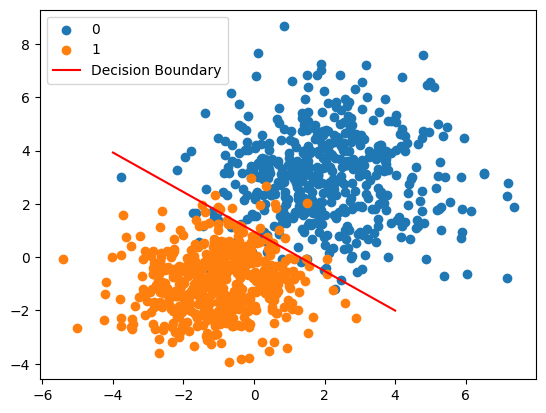

In [23]:
i = np.linspace(-4,4,100)
j =-w[0]/w[1] * i - b/w[1]
plt.scatter(features[:N[0], 0], features[:N[0], 1], label='0')

plt.scatter(features[N[0]:, 0], features[N[0]:, 1], label='1')
plt.plot(i,j, color = 'r', label='Decision Boundary')
plt.legend()

## Concise Implementation

In [24]:
ds = tf.data.Dataset.from_tensor_slices((features,labels))
ds = ds.shuffle(buffer_size=len(X))
ds = ds.batch(20)

In [25]:
kernel_initializer = tf.initializers.RandomNormal(mean=0, stddev=0.01)
bias_initializer = tf.initializers.Zeros()
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=kernel_initializer, bias_initializer=bias_initializer))
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(ds, epochs=20)

Epoch 1/20
50/50 [==============================] - 0s 2ms/step - loss: 0.3669 - accuracy: 0.8840
Epoch 2/20
50/50 [==============================] - 0s 3ms/step - loss: 0.2291 - accuracy: 0.9330
Epoch 3/20
50/50 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.9410
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 0.1788 - accuracy: 0.9400
Epoch 5/20
50/50 [==============================] - 0s 3ms/step - loss: 0.1672 - accuracy: 0.9440
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1587 - accuracy: 0.9480
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9480
Epoch 8/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1473 - accuracy: 0.9490
Epoch 9/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9480
Epoch 10/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1397 - accuracy: 0.9490
Epoch 11/20
50/50 [

In [26]:
w = model.get_weights()
w

[array([[-1.1018294],
        [-1.412705 ]], dtype=float32),
 array([1.2245692], dtype=float32)]

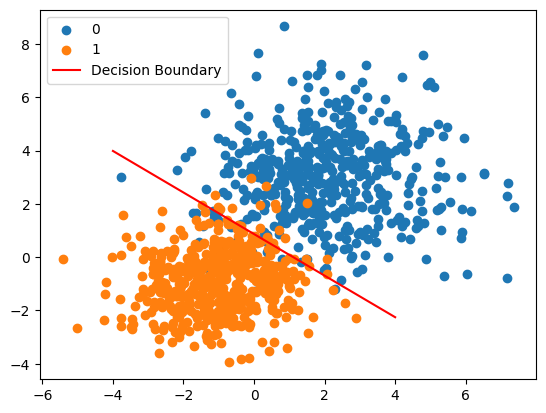

In [27]:
i = np.linspace(-4,4,100)
j =-w[0][0]/w[0][1] * i - w[1]/w[0][1]
plt.scatter(features[:N[0],0], features[:N[0],1], label = '0')
plt.scatter(features[N[0]:,0], features[N[0]:,1],label = '1')
plt.plot(i,j, color = 'r', label='Decision Boundary')
plt.legend()

## Summary
1. The decision boundary for logistic regression is linear.